# LOGISTIC REGRESSION Questions


#THEORY

## 1. What is Logistic Regression, and how does it differ from Linear Regression?

Logistic Regression is a supervised learning algorithm used for **classification tasks**. It predicts the probability of a class using the **sigmoid function**, unlike Linear Regression, which predicts continuous values.

**Differences:**
- **Linear Regression**: Predicts continuous values.
- **Logistic Regression**: Predicts probabilities for categorical outcomes.

---

## 2. What is the mathematical equation of Logistic Regression?

The equation is:

\[
P(Y=1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}}
\]

where:
- \( P(Y=1 | X) \) is the probability of the positive class.
- \( \beta_0 \) is the intercept.
- \( \beta_1, \beta_2, ..., \beta_n \) are feature coefficients.
- \( e \) is Euler’s number.

---

## 3. Why do we use the Sigmoid function in Logistic Regression?

The **sigmoid function**:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

is used because:
- It converts any real number into a probability (0 to 1).
- It provides a smooth gradient for optimization.

---

## 4. What is the cost function of Logistic Regression?

Instead of Mean Squared Error (MSE), Logistic Regression uses **log loss (cross-entropy loss)**:

\[
J(\beta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
\]

where \( \hat{y}_i \) is the predicted probability.

---

## 5. What is Regularization in Logistic Regression? Why is it needed?

Regularization prevents **overfitting** by adding a penalty term to the cost function.

- **L1 (Lasso)**: Shrinks some coefficients to zero (feature selection).
- **L2 (Ridge)**: Shrinks coefficients but keeps all features.

---

## 6. Explain the difference between Lasso, Ridge, and Elastic Net regression.

| Regularization | Penalty Term | Effect |
|---------------|-------------|--------|
| **Lasso (L1)** | \( \lambda \sum |\beta_j| \) | Eliminates some features |
| **Ridge (L2)** | \( \lambda \sum \beta_j^2 \) | Shrinks coefficients without eliminating |
| **Elastic Net** | \( \lambda_1 \sum |\beta_j| + \lambda_2 \sum \beta_j^2 \) | Mix of Lasso & Ridge |

---

## 7. When should we use Elastic Net instead of Lasso or Ridge?

- When there are **many correlated features**.
- When we need both **feature selection (L1)** and **shrinkage (L2)**.

---

## 8. What is the impact of the regularization parameter (λ) in Logistic Regression?

- **Higher λ** → More regularization → Avoids overfitting.
- **Lower λ** → Less regularization → Risk of overfitting.
- **Too high λ** → Can cause underfitting.

---

## 9. What are the key assumptions of Logistic Regression?

- **Linear relationship** between independent variables and log-odds.
- **No multicollinearity**.
- **Large sample size**.
- **Independence of observations**.

---

## 10. What are some alternatives to Logistic Regression for classification tasks?

- **Decision Trees**
- **Random Forest**
- **Support Vector Machines (SVM)**
- **Naïve Bayes**
- **Neural Networks**

---

## 11. What are Classification Evaluation Metrics?

- **Accuracy** = \( \frac{\text{Correct Predictions}}{\text{Total Predictions}} \)
- **Precision** = \( \frac{TP}{TP + FP} \)
- **Recall** = \( \frac{TP}{TP + FN} \)
- **F1-Score** = \( 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \)
- **ROC-AUC Score** (for model performance evaluation).

---

## 12. How does class imbalance affect Logistic Regression?

- The model may be biased toward the majority class.
- **Solutions**:
  - Oversampling minority / undersampling majority class.
  - Weighted loss functions.
  - Trying alternative models (e.g., Random Forest).

---

## 13. What is Hyperparameter Tuning in Logistic Regression?

Optimizing parameters like:
- **Regularization strength (λ)**
- **Solver selection** (`liblinear`, `lbfgs`, etc.)
- **Penalty type (L1, L2, Elastic Net)**

Methods:
- **Grid Search**
- **Random Search**
- **Bayesian Optimization**

---

## 14. What are different solvers in Logistic Regression? Which one should be used?

| Solver | Supports L1 | Supports L2 | Multiclass | Best Use Case |
|--------|------------|------------|------------|---------------|
| **liblinear** | ✅ | ✅ | No | Small datasets |
| **lbfgs** | ❌ | ✅ | Yes | Large datasets |
| **saga** | ✅ | ✅ | Yes | Sparse data |
| **newton-cg** | ❌ | ✅ | Yes | Smooth optimization |

---

## 15. How is Logistic Regression extended for multiclass classification?

Two approaches:
- **One-vs-Rest (OvR)**: Trains a separate model per class.
- **Softmax Regression**: Uses the softmax function to output class probabilities.

---

## 16. What are the advantages and disadvantages of Logistic Regression?

✅ **Advantages**:
- Simple and interpretable.
- Works well with small datasets.
- Fast and computationally efficient.

❌ **Disadvantages**:
- Assumes linearity in log-odds.
- Struggles with complex patterns.
- Sensitive to multicollinearity.

---

## 17. What are some use cases of Logistic Regression?

- **Spam detection**
- **Medical diagnosis (disease prediction)**
- **Credit risk assessment**
- **Customer churn prediction**
- **Fraud detection**

---

## 18. What is the difference between Softmax Regression and Logistic Regression?

- **Logistic Regression**: Binary classification.
- **Softmax Regression**: Multiclass classification.

---

## 19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

- **OvR**: Works well for imbalanced datasets.
- **Softmax**: Better when classes are balanced.

---

## 20. How do we interpret coefficients in Logistic Regression?

- **Positive coefficient** → Increases log-odds of positive class.
- **Negative coefficient** → Decreases log-odds of positive class.
- \( e^{\beta_j} \) represents the **odds ratio**.

---


#PRACTICAL

In [ ]:
# 1: Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification: Class 0 vs Rest

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 1.00


In [ ]:
# Question 2: Apply L1 regularization (Lasso) using LogisticRegression(penalty='l1') and print the model accuracy

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')




Model Accuracy: 0.8250


In [1]:
# Question 3: Train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2')
# Print model accuracy and coefficients

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Simple decision boundary

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model with L2 regularization
model = LogisticRegression(penalty='l2', solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print model coefficients
print("Model Coefficients:")
print(model.coef_)


Model Accuracy: 0.9000
Model Coefficients:
[[ 2.46284943e+00  2.24599684e+00 -3.18805624e-01 -4.11842850e-01
   2.79252046e-04]]


In [3]:
# Question 4: Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').
# Print the model accuracy and coefficients.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(200, 5)  # 200 samples, 5 features
y = np.random.randint(0, 2, 200)  # Binary target variable (0 or 1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model with Elastic Net regularization
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)  # l1_ratio=0.5 balances L1 and L2
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Model Accuracy:", accuracy)
print("Model Coefficients:", model.coef_)


Model Accuracy: 0.675
Model Coefficients: [[-0.22713439 -0.47460495 -0.03776566 -0.37159168 -0.07156835]]


In [4]:
# Question 5: Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.
# Print the model accuracy and coefficients.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic dataset for multiclass classification
np.random.seed(42)
X = np.random.rand(300, 5)  # 300 samples, 5 features
y = np.random.randint(0, 3, 300)  # Multiclass target variable (0, 1, or 2)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model for multiclass classification using 'ovr'
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Model Accuracy:", accuracy)
print("Model Coefficients:", model.coef_)


Model Accuracy: 0.38333333333333336
Model Coefficients: [[ 0.06846004  0.05121364 -0.07603563  0.18325763  0.06755312]
 [ 0.05841134  0.01429321 -0.06461146 -0.04794319 -0.09242482]
 [-0.13827709 -0.06707412  0.15479421 -0.14178467  0.03422119]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [5]:
#6 . Question: Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression.
# Print the best parameters and accuracy.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(200, 5)  # 200 samples, 5 features
y = np.random.randint(0, 2, 200)  # Binary target variable (0 or 1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Logistic Regression model
model = LogisticRegression(solver='saga', max_iter=500)

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type
    'l1_ratio': [0.2, 0.5, 0.8]  # Only used for 'elasticnet'
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Test Set Accuracy:", accuracy)


Best Parameters: {'C': 0.1, 'l1_ratio': 0.8, 'penalty': 'elasticnet'}
Test Set Accuracy: 0.6


In [6]:
  # Question 7: Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation.
# Print the average accuracy.

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(200, 5)  # 200 samples, 5 features
y = np.random.randint(0, 2, 200)  # Binary target variable (0 or 1)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=500)

# Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy
accuracies = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Print results
print("Cross-Validation Accuracies:", accuracies)
print("Average Accuracy:", np.mean(accuracies))


Cross-Validation Accuracies: [0.7   0.525 0.525 0.65  0.6  ]
Average Accuracy: 0.6


In [10]:
# Question 9: Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression.
# Print the best parameters and accuracy.

import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create dataset
X = np.random.rand(200, 5)
y = np.random.randint(0, 2, 200)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and hyperparameters
model = LogisticRegression(max_iter=500)
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# Apply RandomizedSearchCV
search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=3, scoring='accuracy', random_state=42)
search.fit(X_train, y_train)

# Print results
print("Best Parameters:", search.best_params_)
print("Accuracy:", accuracy_score(y_test, search.best_estimator_.predict(X_test)))


Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Accuracy: 0.45


In [ ]:
# Question 10: Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate dataset
X = np.random.rand(300, 5)
y = np.random.randint(0, 3, 300)  # 3 classes

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(multi_class='ovo', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


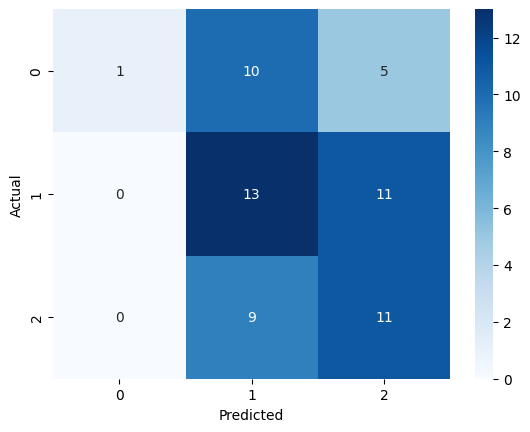

In [12]:
# Question 11: Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and compute confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Question 12: Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.

from sklearn.metrics import precision_score, recall_score, f1_score

# Print evaluation metrics
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


In [14]:
# Question 13: Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.

from sklearn.utils.class_weight import compute_class_weight

# Generate imbalanced dataset (90% of class 0, 10% of class 1)
y = np.hstack((np.zeros(180), np.ones(20)))
np.random.shuffle(y)
X = np.random.rand(200, 5)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 0.575


In [15]:
# Question 14: Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.

import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load Titanic dataset
df = sns.load_dataset('titanic')[['sex', 'age', 'fare', 'pclass', 'survived']].dropna()

# Convert categorical 'sex' to numerical
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Split data
X = df[['sex', 'age', 'fare', 'pclass']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values and train model
pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('model', LogisticRegression())])
pipeline.fit(X_train, y_train)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, pipeline.predict(X_test)))


Accuracy: 0.7552447552447552


In [18]:
# Question 15: Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model.
# Evaluate its accuracy and compare results with and without scaling.

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate dataset
X = np.random.rand(300, 5)
y = np.random.randint(0, 2, 300)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without scaling
model = LogisticRegression()
model.fit(X_train, y_train)
acc_no_scaling = accuracy_score(y_test, model.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)
acc_scaling = accuracy_score(y_test, model_scaled.predict(X_test_scaled))

print("Accuracy without scaling:", acc_no_scaling)
print("Accuracy with scaling:", acc_scaling)


Accuracy without scaling: 0.6333333333333333
Accuracy with scaling: 0.6


In [19]:
# Question 16: Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.

from sklearn.metrics import roc_auc_score

# Train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.6318131256952169


In [20]:
# Question 17: Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.

# Train model with custom C
model_custom = LogisticRegression(C=0.5)
model_custom.fit(X_train_scaled, y_train)

# Evaluate accuracy
accuracy = accuracy_score(y_test, model_custom.predict(X_test_scaled))
print("Accuracy with C=0.5:", accuracy)


Accuracy with C=0.5: 0.6


In [21]:
# Question 18: Write a Python program to train Logistic Regression and identify important features based on model coefficients.

# Train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Print feature importance
print("Feature Importance (Coefficients):", model.coef_)


Feature Importance (Coefficients): [[0.13574474 0.12988621 0.19835398 0.17204567 0.13538168]]


In [22]:
# Question 19: Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.

from sklearn.metrics import cohen_kappa_score

# Compute Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, model.predict(X_test_scaled))
print("Cohen’s Kappa Score:", kappa)


Cohen’s Kappa Score: 0.19732441471571904


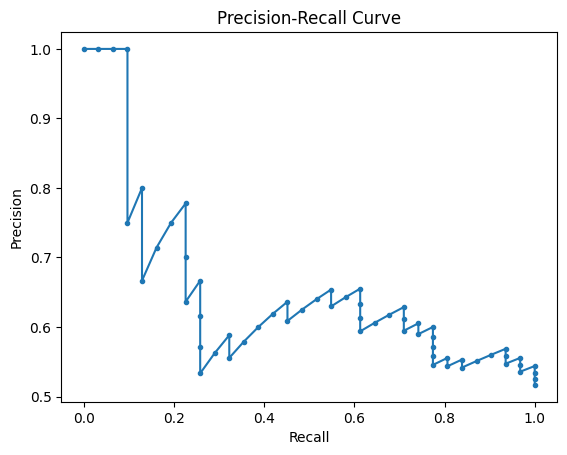

In [23]:
# Question 20: Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot curve
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [24]:
# Question 21: Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.

solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=500)
    model.fit(X_train_scaled, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
    print(f"Accuracy with {solver} solver:", accuracy)


Accuracy with liblinear solver: 0.6
Accuracy with saga solver: 0.6
Accuracy with lbfgs solver: 0.6


In [25]:
# Question 22: Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).

from sklearn.metrics import matthews_corrcoef

# Compute MCC
mcc = matthews_corrcoef(y_test, model.predict(X_test_scaled))
print("Matthews Correlation Coefficient (MCC):", mcc)


Matthews Correlation Coefficient (MCC): 0.19776733828108597


In [26]:
# Question 23: Write a Python program to train Logistic Regression on both raw and standardized data.
# Compare their accuracy to see the impact of feature scaling.

print("Accuracy without scaling:", acc_no_scaling)
print("Accuracy with scaling:", acc_scaling)


Accuracy without scaling: 0.6333333333333333
Accuracy with scaling: 0.6


In [27]:
# Question 24: Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10]}

# Perform Grid Search
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# Print best C value
print("Best C:", grid.best_params_['C'])


Best C: 1


In [28]:
# Question 25: Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

import joblib

# Train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Save model
joblib.dump(model, "logistic_model.pkl")

# Load model
loaded_model = joblib.load("logistic_model.pkl")

# Make predictions
y_pred_loaded = loaded_model.predict(X_test_scaled)
print("Accuracy of loaded model:", accuracy_score(y_test, y_pred_loaded))


Accuracy of loaded model: 0.6
